<a href="https://colab.research.google.com/github/melder2/MLA_MRE/blob/main/MLA4_MRE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Machine Learning Assignment #  
**Michael Elder**  

## Standard Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Imports for specific models
In this section, you will import the models from SKLearn that you will use this in this notebook. 

In [ ]:
#example - you will replace this with the models you are actually using.
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import export_text

## Imports for Splitting Data and Building Pipeline


In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Imports for Performance Measures

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

## Confusion Matrix Function
This function is for creating a graphical version of the confusion matrix.



In [ ]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

# ROC_Curve Function
This function is for plotting the roc_curve

In [ ]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

## Problem 1

### Reading the Data

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/banknote_authentication.csv')

In [ ]:
df.dtypes

variance    float64
skewness    float64
curtosis    float64
entropy     float64
forgery       int64
dtype: object

In [ ]:
df.head()

,variance,skewness,curtosis,entropy,forgery
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


### Statistical and Visual Exploration

### Splitting Data into Train/Test

In [ ]:
X = df[['variance','skewness','curtosis','entropy']]
y = df[['forgery']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=24)

### Building the Pipeline

In [ ]:
num_attribs = ['variance', 'skewness', 'curtosis','entropy']

In [ ]:
col_transform = ColumnTransformer(transformers=[
    
    ('num', MinMaxScaler(), num_attribs)],
    remainder='passthrough'
)

In [ ]:
pipeline = Pipeline([
    ('transform', col_transform),
    ('decision_tree',tree.DecisionTreeClassifier(max_depth=5))
])

### Executing the Model

In [ ]:
pipeline.fit(X_train, np.ravel(y_train))

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['variance', 'skewness',
                                                   'curtosis', 'entropy'])])),
                ('decision_tree', DecisionTreeClassifier(max_depth=5))])

### Evaluating Model

In [ ]:
y_pred = pipeline.predict(X_test)

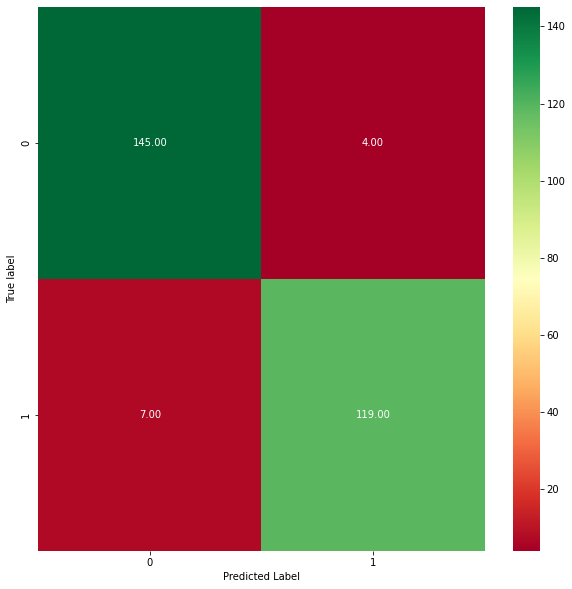

In [ ]:
plot_cm(y_test, y_pred)

In [ ]:
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.967479674796748
0.9444444444444444
0.9558232931726908


### Conclusion
The ML Algorithm predicted:
  False negatives: 7
  False positives: 4
  True negatives: 145 
  True positives: 119
Machine algorithm is very accurate with a precision score is 96.75, recall score is 94.44, and f1 score is 95.58


## Problem 2

### Reading the Data

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/Steel_industry_data.csv')

In [ ]:
df.rename(columns={'Usage_kWh':'usage_kwh'}, inplace=True)
df.rename(columns={'Lagging_Current_Reactive.Power_kVarh':'lag_react_pwr_kvarh'}, inplace=True)
df.rename(columns={'Leading_Current_Reactive_Power_kVarh':'lead_react_pwr_kvarh'}, inplace=True)
df.rename(columns={'Lagging_Current_Power_Factor':'lag_current_pwr'}, inplace=True)
df.rename(columns={'Leading_Current_Power_Factor':'lead_current_pwr'}, inplace=True)
df.rename(columns={'NSM':'nsm'}, inplace=True)
df.rename(columns={'WeekStatus':'week_status'}, inplace=True)
df.rename(columns={'Day_of_week':'day_of_week'}, inplace=True)
df.rename(columns={'Load_Type':'load_type'}, inplace=True)

### Splitting Data into Train/Test

In [ ]:
X = df[['lag_react_pwr_kvarh', 'lead_react_pwr_kvarh',
       'CO2(tCO2)', 'lag_current_pwr', 'lead_current_pwr', 'nsm',
       'week_status', 'day_of_week', 'load_type']]
y = df[['usage_kwh']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=24)

### Building the Pipeline

In [ ]:
cat_attribs = ['week_status','day_of_week','load_type']
num_attribs = ['lag_react_pwr_kvarh','lead_react_pwr_kvarh','CO2(tCO2)','lag_current_pwr','lead_current_pwr','nsm']

In [ ]:
col_transform = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(), cat_attribs),
    ('num', MinMaxScaler(), num_attribs)],
    remainder='passthrough'
)

In [ ]:
pipeline = Pipeline([
    ('transform', col_transform),
    ('decision_tree',tree.DecisionTreeRegressor(max_depth=5))
])

### Executing the Model

In [ ]:
print(len(X_train.columns))
print(len(X_test.columns))

9
9


In [ ]:
pipeline.fit(X_train, np.ravel(y_train))

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['week_status', 'day_of_week',
                                                   'load_type']),
                                                 ('num', MinMaxScaler(),
                                                  ['lag_react_pwr_kvarh',
                                                   'lead_react_pwr_kvarh',
                                                   'CO2(tCO2)',
                                                   'lag_current_pwr',
                                                   'lead_current_pwr',
                                                   'nsm'])])),
                ('decision_tree', DecisionTreeRegressor(max_depth=5))])

### Evaluating Model

In [ ]:
y_pred = pipeline.predict(X_test)

In [41]:
y_pred1 = pipeline.predict(X_train)

In [ ]:
print(mean_squared_error(y_test, y_pred)**0.5)

3.509972741481287


In [42]:
print(mean_squared_error(y_train, y_pred1)**0.5)

3.541903987587041


The testing data performed better than the testing data based on mean squared error

### Conclusion
The root mean squared error for both training set and test set was very low so it is a very suitable model for predicting usage_kwh.